In [164]:
#importing libraries
from selenium import webdriver
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from selenium import webdriver
import pandas as pd
from time import sleep
from bs4 import BeautifulSoup as bsp
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [517]:
driver = webdriver.Chrome(executable_path = "C:\Program Files\chromedriver_win32\chromedriver.exe")
wait = WebDriverWait(driver, 10)

<ipython-input-517-0b710c24e281>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path = "C:\Program Files\chromedriver_win32\chromedriver.exe")


In [518]:
driver.maximize_window()

In [519]:
#login function
def login(un, pw):
    driver.get('https://www.instagram.com/')
    wait = WebDriverWait(driver, 10)
    username = wait.until(EC.presence_of_element_located((By.NAME, 'username')))
    username.send_keys(un)
    password = wait.until(EC.presence_of_element_located((By.NAME, 'password')))
    password.send_keys(pw)
    login = driver.find_element_by_xpath('//button[contains(@type, "submit")]')
    login.submit()

In [520]:
un = 'SAMPLE USERNAME'
pw = 'SAMPLE PASSWORD'

login(un, pw)

<ipython-input-519-e6b95c6b312f>:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  login = driver.find_element_by_xpath('//button[contains(@type, "submit")]')


In [521]:
#for users logging into the session for the first time
wait.until(EC.presence_of_element_located((By.XPATH, '//button[contains(@type, "button")]'))).click()
try:
    notifications = wait.until(EC.presence_of_element_located((By.XPATH, '//button[contains(@class, "bIiDR")]')))
except:
    pass
else:
    notifications.click()

# 1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
2. Now Find the number of posts these handles have done in the previous 3 days.
3. Depict this information using a suitable graph.

In [199]:
#importing the datetime and regex libraries
from datetime import date
import re

In [200]:
#function for finding number of followers
def find_followers(handles):
    followers = {}
    for handle in handles:
        driver.get(f'https://www.instagram.com/{handle}/')
        stats = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'g47SY')))
        followers[handle] = (int)((stats[1].get_attribute('title')).replace(',', ''))
    return followers

In [201]:
#function to find number of posts posted in specified previous number of days
def find_posts(handles, required_days):
    posts = {}
    today = date.today()
    regex = r"(\d{4}-\d{2}-\d{1,2}).*"

    for handle in handles:
        posts[handle] = 0
        driver.get(f'https://www.instagram.com/{handle}/')
        i = 0
        temp = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, '_9AhH0')))
        while True:
            try:
                driver.find_elements_by_class_name('_9AhH0')[i].click()
            except:
                current_end = driver.execute_script('return document.body.scrollHeight;') 
                driver.execute_script('window.scrollTo(0, arguments[0]);', current_end)
                continue
            else:
                time = wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_1o9PC')))
                date_posted = time.get_attribute('datetime')       
                matches = re.search(regex, date_posted)
                date_posted = matches.group(1)
                date_posted = [int(i) for i in date_posted.replace('-', ' ').split()]
                date_posted = date(date_posted[0], date_posted[1], date_posted[2])
                days = (today - date_posted).days
                if(days <= required_days):
                    posts[handle] += 1
                    i += 1
                    driver.back()
                else:
                    break
    return posts

In [202]:
#funciton to plot required plots
def plot(X, Y, Z):
    X_axis = np.arange(len(X))
    
    plt.bar(X_axis, Y)
    plt.xticks(X_axis, X, rotation = 45)
    plt.xlabel("Instagram Handles")
    plt.ylabel("Number")
    plt.title("No. of followers of top handles")
    plt.show()
    
    plt.bar(X_axis, Z)
    plt.xticks(X_axis, X, rotation = 45)
    plt.xlabel("Instagram Handles")
    plt.ylabel("Number")
    plt.title("No. of posts by top handles")
    plt.show()
    
    plt.bar(X_axis - 0.2, np.log(Y), 0.4, label = 'No. of Followers')
    plt.bar(X_axis + 0.2, np.log(Z), 0.4, label = 'No. of Posts')
    plt.xticks(X_axis, X, rotation = 45)
    plt.xlabel("Instagram Handles")
    plt.ylabel("Number (Logarithmic Scale)")
    plt.title("No. of followers and posts of top handles")
    plt.legend(bbox_to_anchor = (1.05, 0.6))
    plt.show()

<ipython-input-201-d320d17abd9a>:13: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  driver.find_elements_by_class_name('_9AhH0')[i].click()


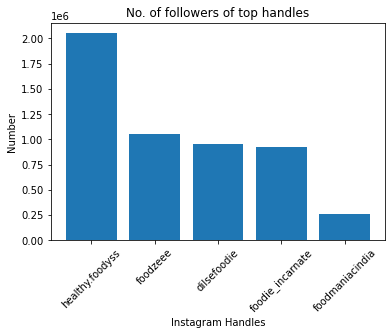

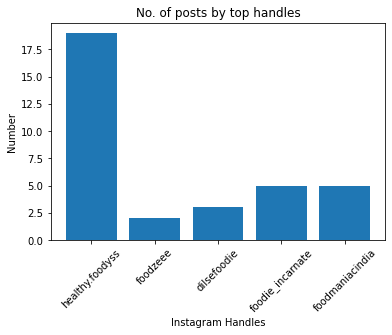

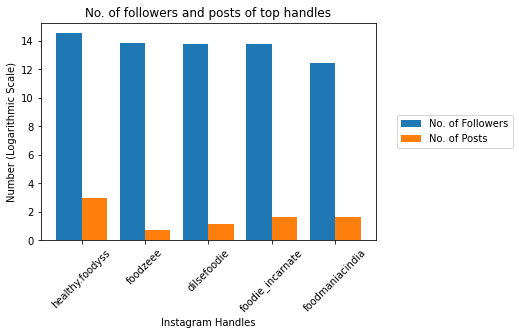

In [203]:
handles = ['foodie_incarnate', 'healthy.foodyss', 'food_in_my_vein', 'food_lunatic', 'foodzeee', 'dilsefoodie', 'food', 'delhi_street_food1', 'foodgasm_prayagraj', 'foodmaniacindia']
followers = find_followers(handles)
followers = dict(sorted(followers.items(), key = lambda i: i[1], reverse = True))

top_5 = []
i = 0
for user in followers.keys():
    top_5.append(user)
    i += 1
    if i == 5:
        break
posts = find_posts(top_5, 3)

X = top_5
Y = np.array(list(followers.values())[0:5])
Z = np.array(list(posts.values()))
plot(X, Y, Z)

# 2. Your friend also needs a list of hashtags that he should use in his posts.
1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
3. Create a csv file with two columns : the word and its frequency
4. Now, find the hashtags that were most popular among these bloggers
5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [418]:
#top 5 handles with most followers
top_5

['healthy.foodyss',
 'foodzeee',
 'dilsefoodie',
 'foodie_incarnate',
 'foodmaniacindia']

In [422]:
#function to find words and calculate their frequencies
def prepare_listofwords(handles):
    words = {}
    for handle in handles:
        driver.get(f'https://www.instagram.com/{handle}/')
        for i in range(10):
            post = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, '_9AhH0')))
            post[i].click()
            content = wait.until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "C4VMK")]')))
            content = content.find_elements_by_tag_name('span')[-1]
            s = content.get_attribute('innerText')
            s = re.sub(r'[^\w\s\#\@]', '', s)
            s = re.sub('\n', ' ', s)
            s = re.sub('#', ' #', s)
            for word in s.split():
                if not(words.get(word.lower())):
                    words[word.lower()] = 1
                else:
                    words[word.lower()] += 1
            driver.back()
    return words

#function to export the data to a .csv file 
def to_csv(words):
    df = pd.DataFrame(list(words.items()), columns = ['Word', 'Frequency'])
    df.to_csv('words_and_frequencies.csv')
    return df

#function to find the top 5 hashtags
def find_popular_hashtags(df):
    df = df[df['Word'].str[0] == '#']
    df.reset_index(inplace = True, drop = True)
    df.sort_values('Frequency', ascending = False, inplace = True)
    df.reset_index(inplace = True, drop = True)
    top_hashtags = df.iloc[0:5]
    print('The top 5 hashtags were:')
    for word in top_hashtags['Word']:
        print(word)
    return top_hashtags

#function to plot the pie chart of obtained data
def plot_piechart(top_hashtags): 
    def helper(value):
        value = np.round(value/100.*top_hashtags['Frequency'].sum(), 0)
        return int(value)
    
    plt.pie(x = top_hashtags['Frequency'], labels = top_hashtags['Word'], autopct = helper)
    plt.show()

The top 5 hashtags were:
#reelkarofeelkaro
#reelitfeelit
#dilsefoodie
#foodmaniacindia
#foodieincarnate


<ipython-input-422-92f44e51a911>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values('Frequency', ascending = False, inplace = True)


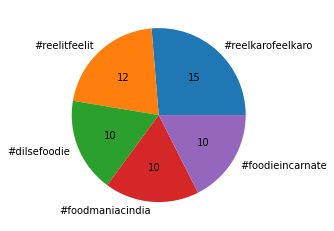

In [423]:
handles = top_5

words = prepare_listofwords(handles)
df = to_csv(words)
top_hashtags = find_popular_hashtags(df)
plot_piechart(top_hashtags)

# 3. You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:
1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.
2. Calculate the average likes for a handle.
3. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
4. Create a bar graph to depict the above obtained information.

In [522]:
#top 5 handles with most followers
top_5

['healthy.foodyss',
 'foodzeee',
 'dilsefoodie',
 'foodie_incarnate',
 'foodmaniacindia']

In [523]:
#function to calculate total number of likes for given handles, for given number of posts
def calculate_likes(handles, num_of_posts):
    likes = {}
    for handle in handles:
        driver.get(f'https://www.instagram.com/{handle}/')
        likes[handle] = 0
        for i in range(num_of_posts):
            post = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, '_9AhH0')))
            post[i].click()
            try:
                like_element = wait.until(EC.presence_of_element_located((By.XPATH, '//a[contains(@class, "zV_Nj")]//span')))
            except:
                driver.find_element_by_class_name('vcOH2').click()
                num = driver.find_element_by_xpath('//div[contains(@class, "vJRqr")]//span').get_attribute('innerText')
                num = int(num.replace(',', ''))
                likes[handle] += num
            else:
                num = like_element.get_attribute('innerText')
                if(num == ''):
                    num = driver.find_elements(By.XPATH, '//a[contains(@class, "zV_Nj")]//span')[1].get_attribute('innerText')
                    num = int(num.replace(',', ''))
                    num += 1
                    likes[handle] += num
                else:
                    num = int(num.replace(',', ''))
                    likes[handle] += num
            driver.back()
    return likes

#function to calculate the average followers:likes ratio
def calculate_average_fl_ratio(likes):
    print('Average Likes for a handle:')
    for user in likes:
        likes[user] = float(likes[user]/10)
        print(user, likes[user])
    print()
    print('Average Followers:Likes ratio for a handle:')
    for user in likes:
        likes[user] = followers[user]/likes[user]
        print(user, likes[user])

In [524]:
#function to plot the average followers:likes ratio
def plot_avg_fl_ratio(X, Y):
    X_axis = np.arange(len(X))
    
    plt.bar(X_axis, Y)
    plt.xticks(X_axis, X, rotation = 45)
    plt.xlabel("Instagram Handles")
    plt.ylabel("Average Followers:Likes Ratio")
    plt.title("Average Followers:Likes Ratio")
    plt.show()

<ipython-input-523-8af469a19680>:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_class_name('vcOH2').click()
<ipython-input-523-8af469a19680>:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  num = driver.find_element_by_xpath('//div[contains(@class, "vJRqr")]//span').get_attribute('innerText')


Average Likes for a handle:
healthy.foodyss 4422.3
foodzeee 75771.2
dilsefoodie 17478.1
foodie_incarnate 68692.2
foodmaniacindia 560.7

Average Followers:Likes ratio for a handle:
healthy.foodyss 464.3888926576668
foodzeee 13.876433262242118
dilsefoodie 54.27060149558591
foodie_incarnate 13.416137494504472
foodmaniacindia 460.7223113964687


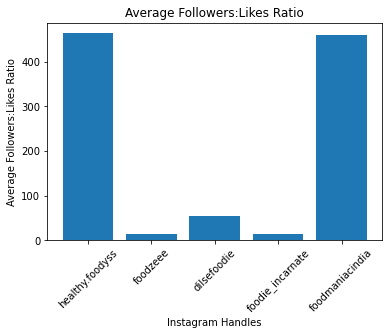

In [525]:
likes = calculate_likes(top_5, 10)
calculate_average_fl_ratio(likes)

X = likes.keys()
Y = likes.values()
plot_avg_fl_ratio(X, Y)